 Missing values before imputation: 115938
 Missing values after imputation: 0


C:\Users\sanja\AppData\Local\Temp\ipykernel_13160\263867512.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


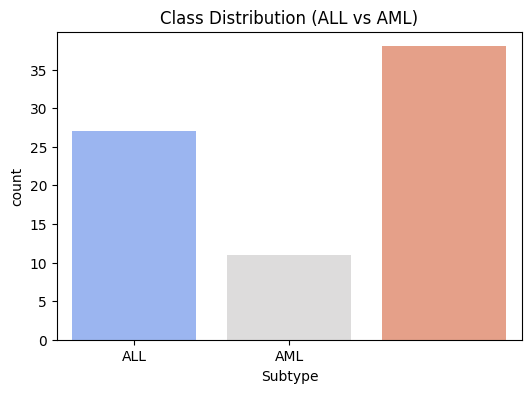


Summary statistics:
       AFFX-HUMISGF3A/M97935_MA_at  AFFX-HUMISGF3A/M97935_MB_at  \
count                 7.600000e+01                 7.600000e+01   
mean                  1.168656e-17                 4.090295e-17   
std                   7.118052e-01                 7.118052e-01   
min                  -3.416709e-01                -8.222370e-01   
25%                  -3.416709e-01                -2.782576e-01   
50%                   2.337312e-17                 3.505967e-17   
75%                   2.337312e-17                 3.505967e-17   
max                   4.045182e+00                 3.442628e+00   

       AFFX-HUMISGF3A/M97935_3_at  AFFX-HUMRGE/M10098_5_at  \
count                7.600000e+01             7.600000e+01   
mean                -5.258951e-17             3.556183e-17   
std                  7.118052e-01             7.118052e-01   
min                 -1.983447e+00            -1.379412e+00   
25%                 -4.592544e-02            -1.699113e-02   
50%

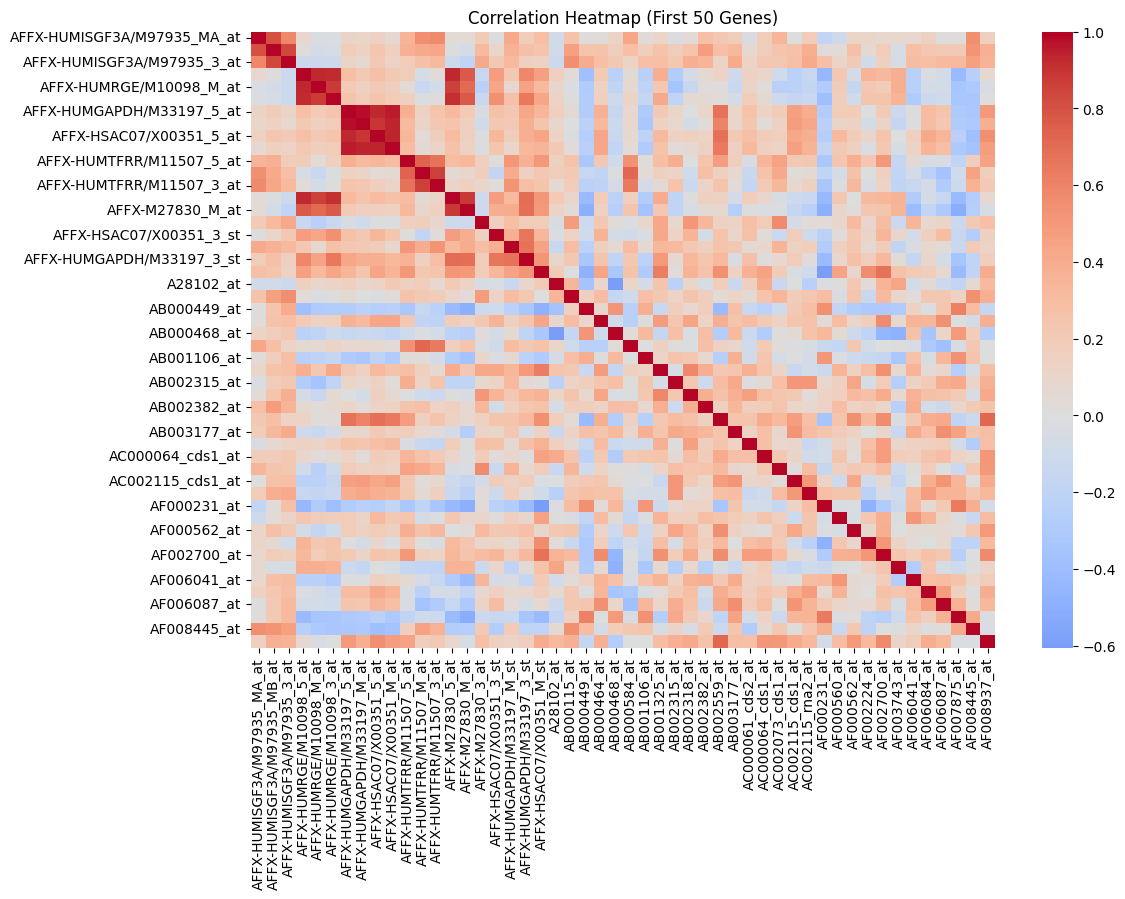

<Axes: xlabel='PCA1', ylabel='PCA2'>

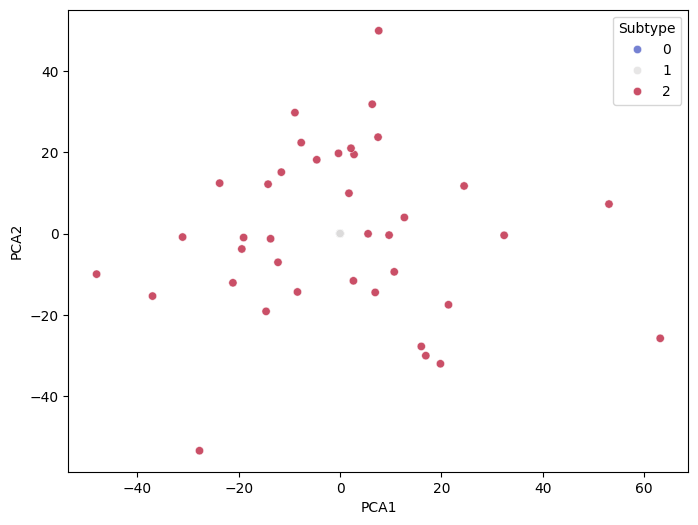

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

#  Load preprocessed dataset
data_path = r"C:\Users\sanja\4.Leukemia Subtype Prediction Using Gene Expression\4.Leukemia_Subtype_Prediction\data\leukemia_golub99_preprocessed.csv"
df = pd.read_csv(data_path)

#  Target and Features
target = "Subtype"
X = df.drop(columns=[target])
y = df[target]

# 1️ Handle Missing Values
print(f" Missing values before imputation: {X.isnull().sum().sum()}")
imputer = SimpleImputer(strategy="mean")  # Replace NaN with mean
X_imputed = imputer.fit_transform(X)
print(f" Missing values after imputation: {np.isnan(X_imputed).sum()}")

# 2️ Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.xticks([0,1], ["ALL", "AML"])
plt.title("Class Distribution (ALL vs AML)")
plt.show()

# 3️ Summary statistics
print("\nSummary statistics:")
print(pd.DataFrame(X_imputed, columns=X.columns).describe())

# 4️ Correlation heatmap (first 50 genes for speed)
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_imputed, columns=X.columns).iloc[:, :50].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (First 50 Genes)")
plt.show()

# 5️ PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Subtype": y
})

# Ensure Subtype is integer for color mapping
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Subtype",
    palette="coolwarm",  # Automatically handles 2+ classes
    alpha=0.7,
    data=pca_df
)